<a href="https://colab.research.google.com/github/pranavreddy1721/BPUC/blob/main/Car_Price_Prediction_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
# 📦 Install all required libraries
!pip install -q pandas numpy matplotlib seaborn scikit-learn joblib plotly


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [59]:
# 🚗 Create a larger, balanced car dataset (40 samples)
data = {
    'Brand': ['Maruti','Hyundai','Honda','Audi','Toyota','Maruti','BMW','Hyundai','Honda','Audi',
              'Toyota','Maruti','BMW','Hyundai','Honda','Audi','Toyota','Maruti','BMW','Hyundai',
              'Maruti','Hyundai','Honda','Audi','Toyota','Maruti','BMW','Hyundai','Honda','Audi',
              'Toyota','Maruti','BMW','Hyundai','Honda','Audi','Toyota','Maruti','BMW','Hyundai'],

    'Model': ['Swift','i20','City','A4','Corolla','Baleno','X5','Creta','Civic','Q7',
              'Fortuner','WagonR','3 Series','Venue','Amaze','A6','Innova','Celerio','X3','Tucson',
              'Dzire','Verna','Jazz','A3','Camry','Eeco','7 Series','Santro','WR-V','Q5',
              'Altis','Ertiga','Z4','Sonata','BR-V','A8','Etios','S-Cross','X1','Aura'],

    'Year': [2019,2020,2017,2020,2021,2021,2019,2022,2018,2020,
             2019,2017,2021,2020,2019,2022,2021,2018,2019,2021,
             2018,2019,2017,2019,2021,2020,2020,2019,2018,2021,
             2019,2020,2021,2018,2019,2022,2021,2019,2020,2021],

    'Fuel_Type': ['Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Diesel','Petrol','Diesel','Petrol',
                  'Diesel','Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Petrol',
                  'Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Diesel','Petrol','Diesel','Petrol',
                  'Diesel','Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Petrol','Diesel','Petrol'],

    'Transmission': ['Manual','Automatic','Manual','Automatic','Manual','Automatic','Automatic','Manual','Automatic','Automatic',
                     'Manual','Automatic','Automatic','Manual','Manual','Automatic','Manual','Automatic','Automatic','Manual',
                     'Manual','Automatic','Manual','Automatic','Manual','Automatic','Automatic','Manual','Manual','Automatic',
                     'Manual','Automatic','Automatic','Manual','Manual','Automatic','Manual','Automatic','Automatic','Manual'],

    'Engine': [1200,1400,1600,1800,2000,1300,3000,1600,1800,2600,
               2400,1000,2200,1500,1500,2000,2400,1100,2000,1900,
               1300,1600,1500,1800,2100,1200,3000,1300,1600,2200,
               2000,1400,2500,1600,1500,2400,2300,1400,2000,1700],

    'Mileage': [22.0,20.5,18.0,15.0,16.5,21.0,12.0,19.0,17.0,14.0,
                15.0,23.0,13.5,18.5,19.5,14.5,14.0,22.5,13.8,17.5,
                20.0,18.0,19.0,16.0,15.5,21.0,11.5,19.5,17.8,15.2,
                16.8,20.5,14.0,18.0,19.0,13.8,15.2,21.5,14.3,18.2],

    'Price': [5.0,8.5,9.0,28.0,14.0,7.0,40.0,13.0,10.0,36.0,
              25.0,6.0,35.0,12.0,9.5,32.0,22.0,5.5,30.0,15.0,
              8.0,10.5,9.2,26.0,18.0,6.5,38.0,11.5,9.8,29.0,
              23.0,8.5,34.0,13.5,10.5,31.0,21.0,7.5,27.0,14.5]
}

df = pd.DataFrame(data)
print("✅ Balanced Car Dataset (40 samples) created successfully!")
df.head()


✅ Balanced Car Dataset (40 samples) created successfully!


,Brand,Model,Year,Fuel_Type,Transmission,Engine,Mileage,Price
0,Maruti,Swift,2019,Petrol,Manual,1200,22.0,5.0
1,Hyundai,i20,2020,Diesel,Automatic,1400,20.5,8.5
2,Honda,City,2017,Petrol,Manual,1600,18.0,9.0
3,Audi,A4,2020,Diesel,Automatic,1800,15.0,28.0
4,Toyota,Corolla,2021,Petrol,Manual,2000,16.5,14.0


In [60]:
# 🔧 Data preprocessing
le = LabelEncoder()
for column in ['Brand', 'Model', 'Fuel_Type', 'Transmission']:
    df[column] = le.fit_transform(df[column])

print("✅ After Encoding:")
df.head()


✅ After Encoding:


,Brand,Model,Year,Fuel_Type,Transmission,Engine,Mileage,Price
0,4,29,2019,1,1,1200,22.0,5.0
1,3,39,2020,0,0,1400,20.5,8.5
2,2,13,2017,1,1,1600,18.0,9.0
3,0,3,2020,0,0,1800,15.0,28.0
4,5,15,2021,1,1,2000,16.5,14.0


In [61]:
# 🧩 Split dataset into train/test and apply scaling
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [62]:
#  Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 2.4989523269565415
RMSE: 2.927039698143729
R² Score: 0.9419038971176613


In [63]:
# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Results:
MAE: 3.8333333333333335
RMSE: 4.708148963941845
R² Score: 0.8496892070069693


In [64]:
#  Random Forest Model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MAE: 3.5563333333333333
RMSE: 4.431410384967747
R² Score: 0.8668400210962517


In [65]:
#  Compare all models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    'R² Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

print("✅ Model Performance Comparison:")
print(results)

✅ Model Performance Comparison:
               Model       MAE      RMSE  R² Score
0  Linear Regression  2.498952  2.927040  0.941904
1      Decision Tree  3.833333  4.708149  0.849689
2      Random Forest  3.556333  4.431410  0.866840


✅ Actual vs Predicted Car Prices:



,Actual Price,Predicted Price
0,15.0,13.78
1,22.0,24.89
2,32.0,27.54
3,38.0,30.84
4,14.0,19.46
5,35.0,29.77
6,7.5,7.18
7,11.5,9.73
8,14.5,13.52
9,40.0,31.44


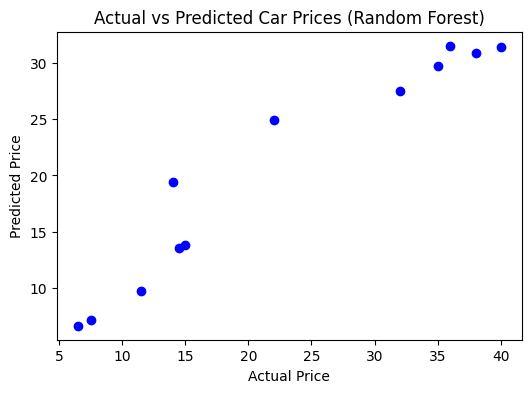

In [66]:
# 📊 Compare Actual vs Predicted Prices (using the best model: Random Forest)

# Create a DataFrame to compare results
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred_rf
})

# Round values for neat display
comparison_df = comparison_df.round(2)

print("✅ Actual vs Predicted Car Prices:\n")
display(comparison_df.head(10))  # shows first 10 rows

# Optional: visualize comparison
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.show()


✅ Prediction Errors for Each Car:



,Actual Price,Predicted Price,Error (Predicted - Actual),Prediction Type
0,15.0,13.78,-1.22,Underpredicted
1,22.0,24.89,2.89,Overpredicted
2,32.0,27.54,-4.46,Underpredicted
3,38.0,30.84,-7.16,Underpredicted
4,14.0,19.46,5.46,Overpredicted
5,35.0,29.77,-5.23,Underpredicted
6,7.5,7.18,-0.32,Underpredicted
7,11.5,9.73,-1.77,Underpredicted
8,14.5,13.52,-0.98,Underpredicted
9,40.0,31.44,-8.56,Underpredicted


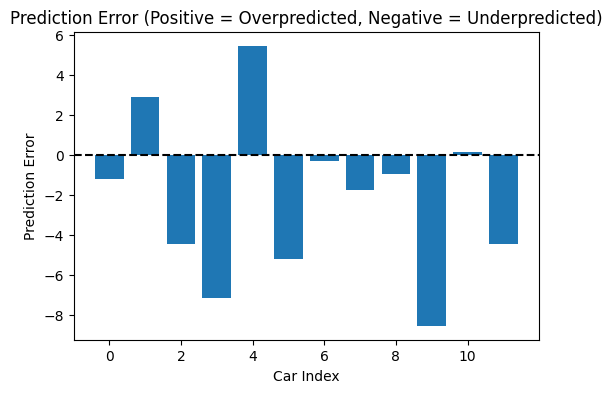

In [67]:
# 📉 Calculate prediction error (difference between actual and predicted prices)

# Create a new column for error (difference)
comparison_df['Error (Predicted - Actual)'] = comparison_df['Predicted Price'] - comparison_df['Actual Price']

# Add a column to show if prediction was Over or Under
comparison_df['Prediction Type'] = comparison_df['Error (Predicted - Actual)'].apply(
    lambda x: 'Overpredicted' if x > 0 else 'Underpredicted'
)

print("✅ Prediction Errors for Each Car:\n")
display(comparison_df.head(10))  # show first 10 rows

# Optional: visualize errors
plt.figure(figsize=(6,4))
plt.bar(range(len(comparison_df)), comparison_df['Error (Predicted - Actual)'])
plt.xlabel("Car Index")
plt.ylabel("Prediction Error")
plt.title("Prediction Error (Positive = Overpredicted, Negative = Underpredicted)")
plt.axhline(0, color='black', linestyle='--')
plt.show()


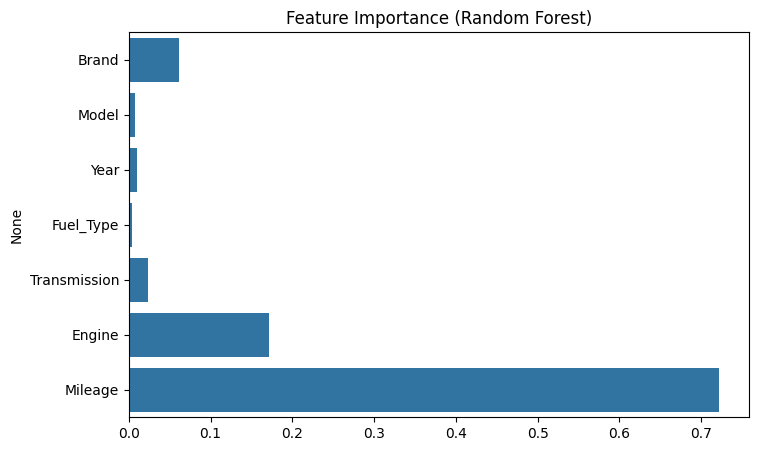

In [68]:
# 💡 Feature Importance
importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [69]:
# 💾 Save model
joblib.dump(rf, 'car_price_prediction_model.pkl')
print("✅ Model saved successfully as car_price_prediction_model.pkl!")


✅ Model saved successfully as car_price_prediction_model.pkl!
